In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("ecommerce_customer_data_custom_ratios.csv")

In [4]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [6]:
df.describe()


,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


In [7]:
df.isnull().sum()


Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True) 

In [9]:
df.dropna(inplace=True)  

In [10]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])  

<Axes: title={'center': 'Most Purchased Categories'}, xlabel='Product Category'>

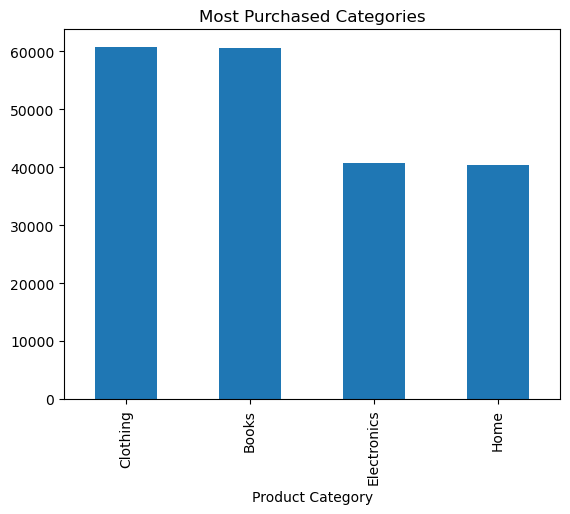

In [11]:
df['Product Category'].value_counts().plot(kind='bar', title='Most Purchased Categories')


<Axes: title={'center': 'Avg Spend by Age'}, xlabel='Customer Age'>

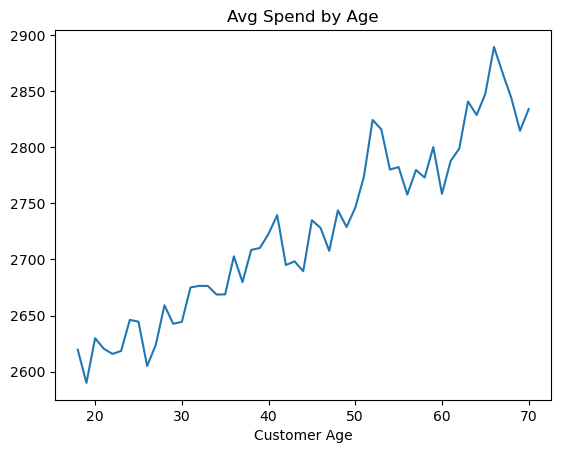

In [12]:
df.groupby('Customer Age')['Total Purchase Amount'].mean().plot(kind='line', title='Avg Spend by Age')


C:\Users\roina\AppData\Local\Temp\ipykernel_10860\3480960122.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Purchase Date')['Total Purchase Amount'].resample('M').sum().plot(title='Monthly Sales')


<Axes: title={'center': 'Monthly Sales'}, xlabel='Purchase Date'>

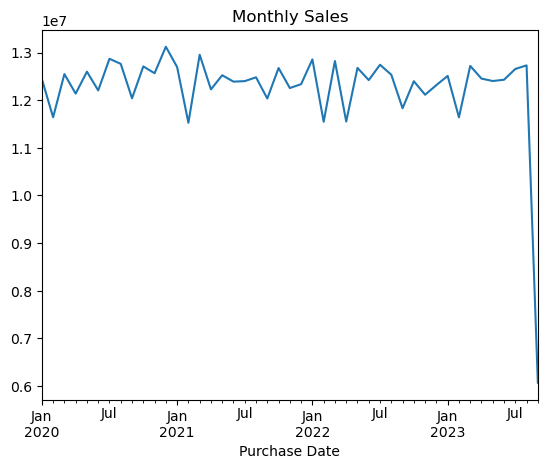

In [13]:
df.set_index('Purchase Date')['Total Purchase Amount'].resample('M').sum().plot(title='Monthly Sales')


<Axes: xlabel='Gender', ylabel='Total Purchase Amount'>

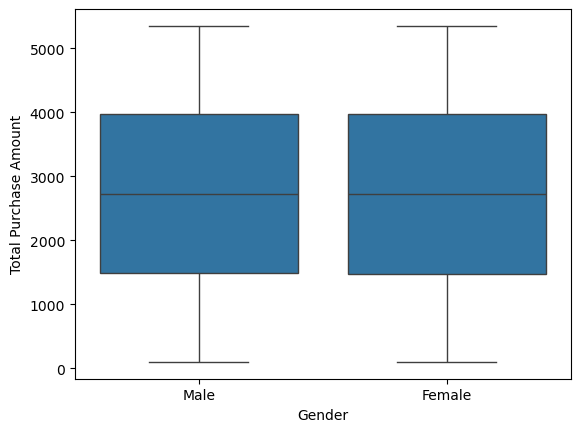

In [14]:
import seaborn as sns
sns.boxplot(x='Gender', y='Total Purchase Amount', data=df)


In [15]:
high_value = df.groupby('Customer ID')['Total Purchase Amount'].sum().sort_values(ascending=False)

In [16]:
high_value.head(10)

Customer ID
26977    48497
6786     42385
1195     41980
36706    41976
44337    41562
20305    41347
31712    40938
14400    40772
5844     40534
48399    40528
Name: Total Purchase Amount, dtype: int64

<Axes: title={'center': 'Top 10 High-Value Customers'}, xlabel='Customer ID'>

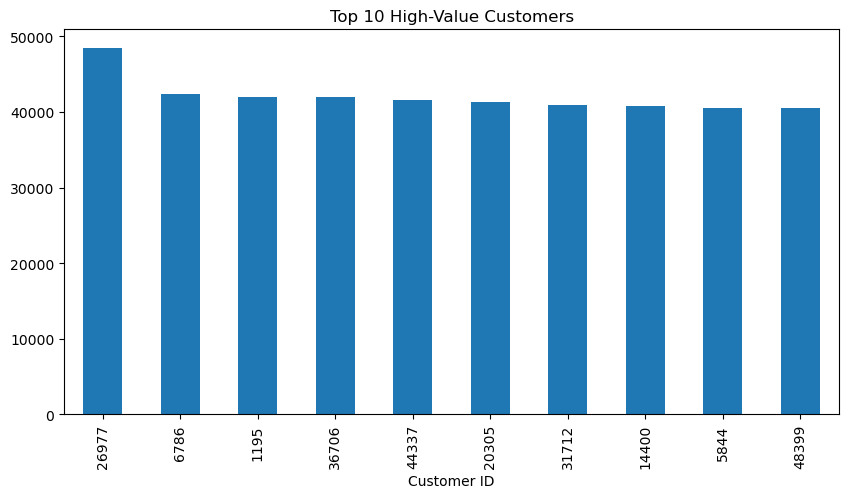

In [17]:
high_value.head(10).plot(kind='bar', title='Top 10 High-Value Customers', figsize=(10,5))


In [18]:
# Count of product category combinations per customer
df.groupby(['Customer ID', 'Product Category']).size().unstack(fill_value=0).head()


Product Category,Books,Clothing,Electronics,Home
Customer ID,,,,
1,1,0,0,0
2,1,0,1,0
3,1,4,1,1
4,0,1,0,0
5,0,2,2,2


<Axes: title={'center': 'Avg Spend by Age'}, xlabel='Customer Age'>

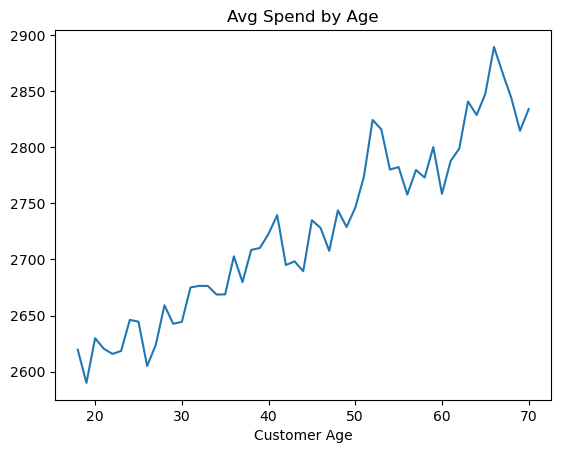

In [19]:
df.groupby('Customer Age')['Total Purchase Amount'].mean().plot(kind='line', title='Avg Spend by Age')


<Axes: xlabel='Customer Age', ylabel='Total Purchase Amount'>

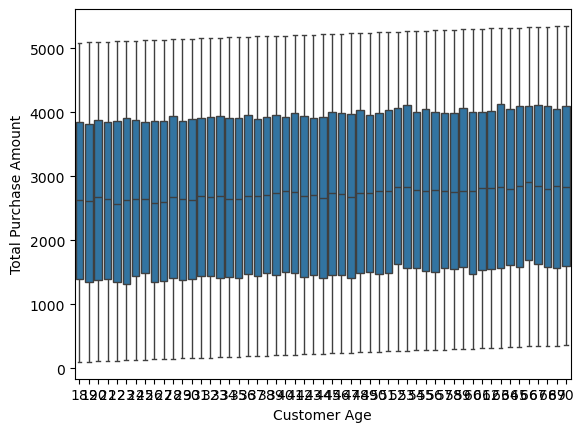

In [20]:
import seaborn as sns
sns.boxplot(x='Customer Age', y='Total Purchase Amount', data=df)


<Axes: xlabel='Gender', ylabel='Total Purchase Amount'>

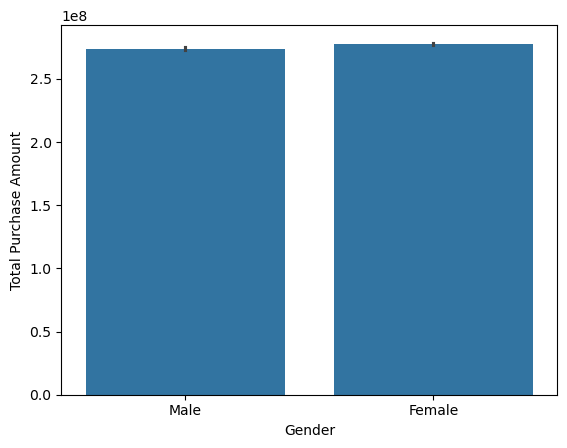

In [21]:
sns.barplot(x='Gender', y='Total Purchase Amount', data=df, estimator=sum)


<Axes: xlabel='Gender', ylabel='Total Purchase Amount'>

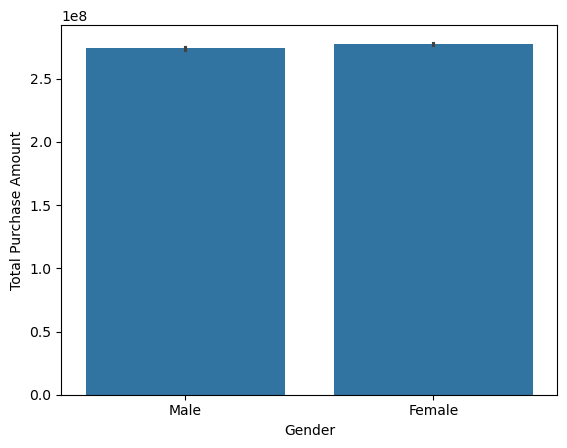

In [22]:
sns.barplot(x='Gender', y='Total Purchase Amount', data=df, estimator=sum)

In [23]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()


In [ ]:

**Insight**: Customers aged 35–45 appear to spend more on average, suggesting a strong marketing segment.


<Axes: title={'center': 'Top Product Categories by Revenue'}, xlabel='Product Category'>

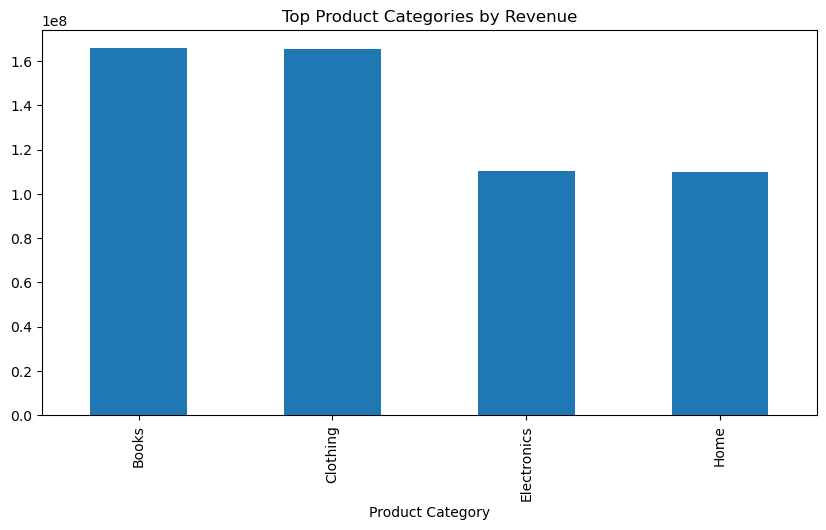

In [25]:
top_categories = df.groupby('Product Category')['Total Purchase Amount'].sum().sort_values(ascending=False)
top_categories.plot(kind='bar', title='Top Product Categories by Revenue', figsize=(10,5))


In [26]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Purchase Date'>

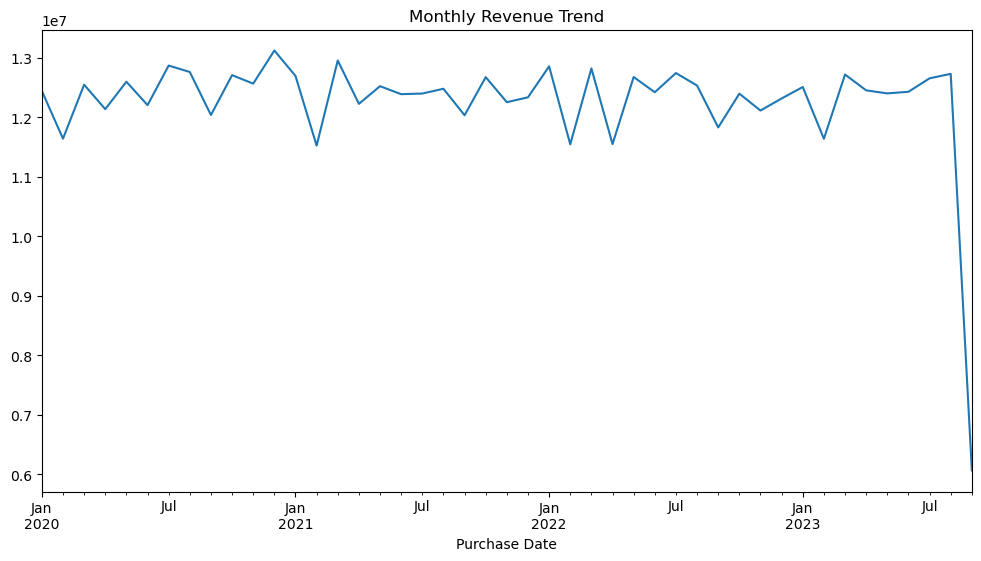

In [28]:
monthly_revenue = df.set_index('Purchase Date')['Total Purchase Amount'].resample('ME').sum()
monthly_revenue.plot(title='Monthly Revenue Trend', figsize=(12,6))


<Axes: xlabel='Gender', ylabel='Total Purchase Amount'>

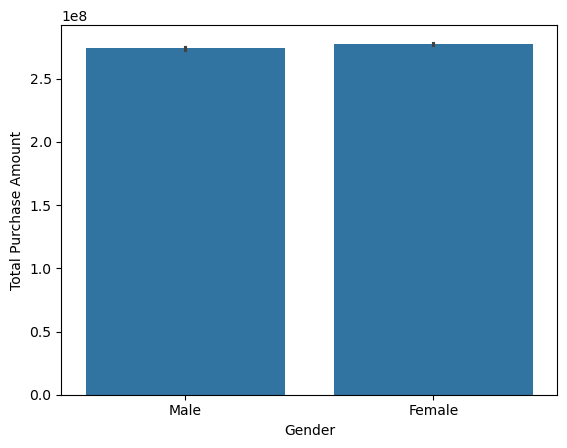

In [29]:
import seaborn as sns
sns.barplot(x='Gender', y='Total Purchase Amount', data=df, estimator=sum)


<Axes: title={'center': 'Average Spend by Age'}, xlabel='Customer Age'>

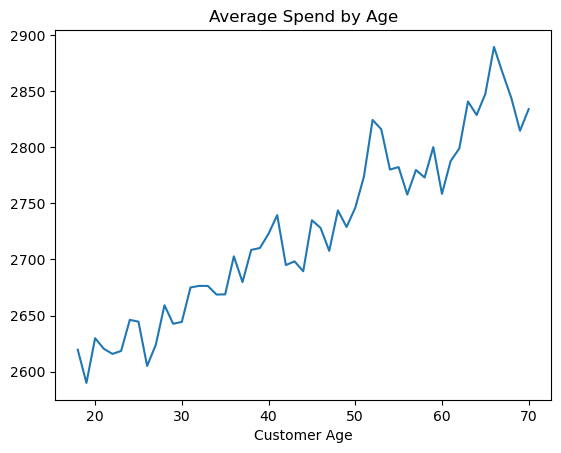

In [30]:
df.groupby('Customer Age')['Total Purchase Amount'].mean().plot(kind='line', title='Average Spend by Age')


Text(0.5, 1.0, 'Feature Correlations')

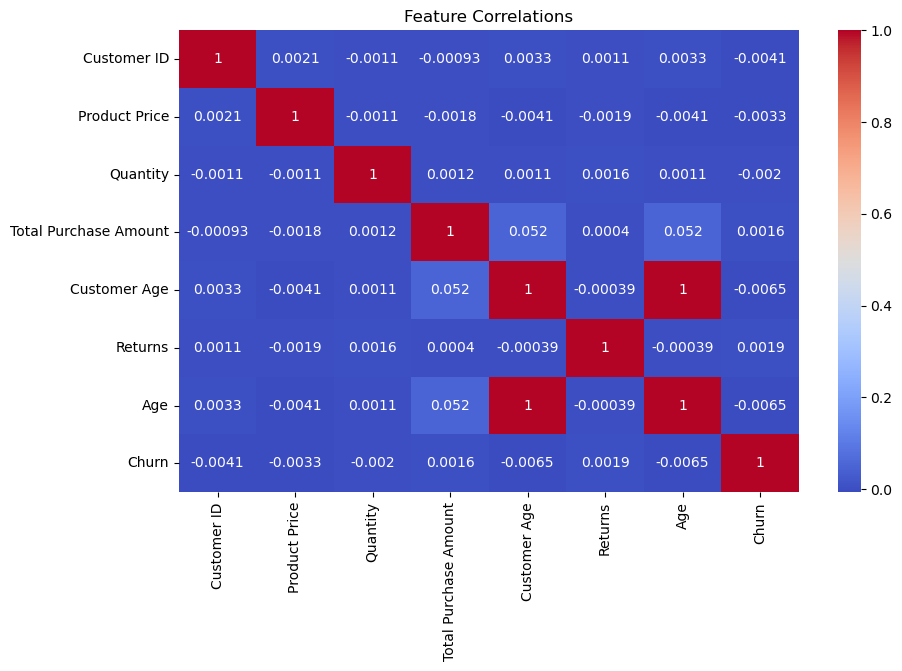

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")


In [ ]:
### Insight 1: Who are our high-value customers?
By grouping total spend per customer, we can identify our top 10 most valuable clients.
This helps the business focus on loyalty and targeted marketing.


In [ ]:
### Final Business Insights
- Customers aged 35–45 tend to spend the most, making them ideal for targeted ads.
- Electronics and Home products generate the highest revenue.
- Male customers show slightly higher average purchase amounts.


In [ ]:
### Final Takeaways
- 📌 Electronics and Home products generate the most revenue.
- 👥 Customers aged 35–45 are top spenders.
- 📊 Male customers slightly outspend females, though both groups are active.
- 📅 Sales spike in the final quarter, indicating seasonal peaks.

**Recommendation:** Focus retention strategies on high-value segments and run campaigns during peak periods.
